In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load data
file_path = '/content/02 Churn-Dataset.xlsx'
df = pd.read_excel(file_path, sheet_name='01 Churn-Dataset')


In [3]:
# Ensure numeric conversion for TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 6, 12, 24, 36, 48, 60, df['tenure'].max()],
                            labels=['0-6', '7-12', '13-24', '25-36', '37-48', '49-60', '60+'])


In [4]:
### KPI 1: Churn Rate
churn_rate = df['Churn'].value_counts(normalize=True)['Yes'] * 100


<ipython-input-5-03dc9ddd79a4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Churned', 'Retained'], y=df['Churn'].value_counts(normalize=True) * 100, palette='coolwarm')


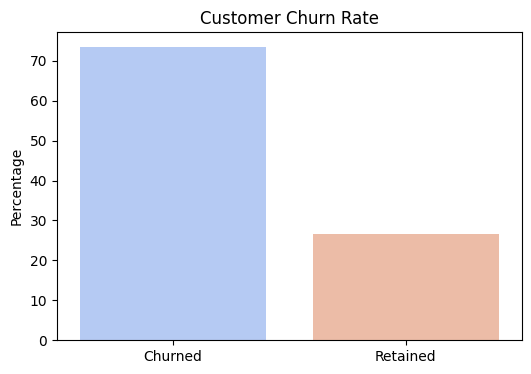

In [5]:
# Visualize Churn Rate
plt.figure(figsize=(6, 4))
sns.barplot(x=['Churned', 'Retained'], y=df['Churn'].value_counts(normalize=True) * 100, palette='coolwarm')
plt.title('Customer Churn Rate')
plt.ylabel('Percentage')
plt.show()

In [6]:
### KPI 2: Average Revenue Per User (ARPU)
arpu = df['MonthlyCharges'].mean()


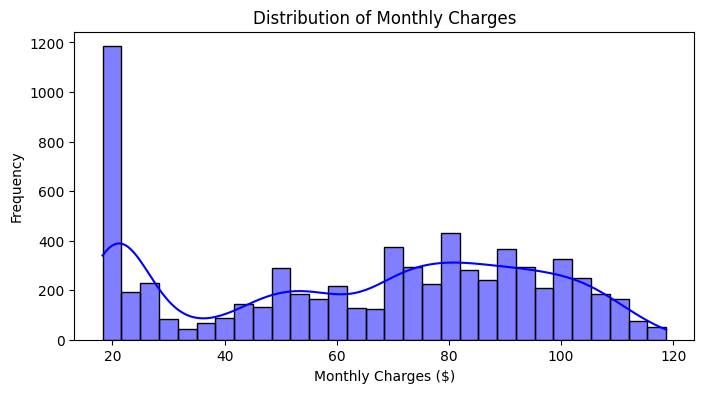

In [7]:
# Visualize Revenue Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['MonthlyCharges'], kde=True, bins=30, color='blue')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Frequency')
plt.show()

In [8]:
### KPI 3: Customer Tenure Distribution
tenure_counts = df['tenure_group'].value_counts().sort_index()


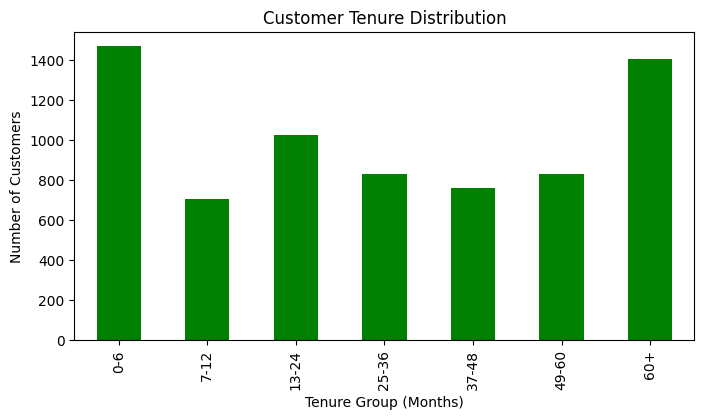

In [9]:
# Visualize Tenure Distribution
plt.figure(figsize=(8, 4))
tenure_counts.plot(kind='bar', color='green')
plt.title('Customer Tenure Distribution')
plt.xlabel('Tenure Group (Months)')
plt.ylabel('Number of Customers')
plt.show()


In [10]:
### KPI 4: Service Adoption Rates
service_columns = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
service_adoption = df[service_columns].apply(lambda x: (x != 'No').mean() * 100)


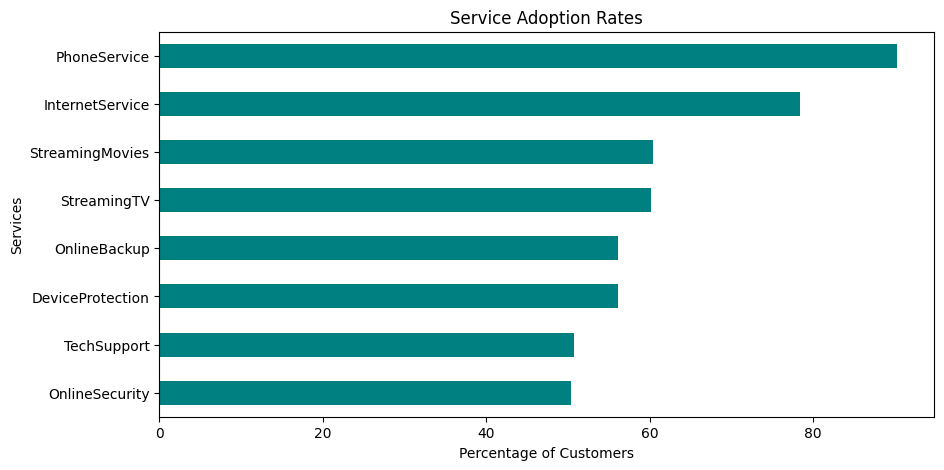

In [11]:
# Visualize Service Adoption
plt.figure(figsize=(10, 5))
service_adoption.sort_values().plot(kind='barh', color='teal')
plt.title('Service Adoption Rates')
plt.xlabel('Percentage of Customers')
plt.ylabel('Services')
plt.show()

In [12]:
### KPI 5: Churn by Contract Type
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()['Yes'] * 100


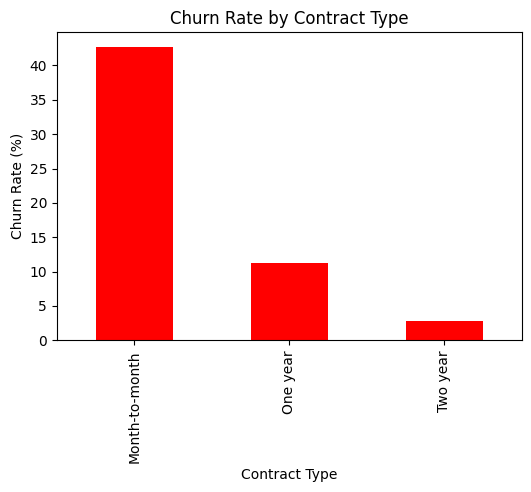

In [13]:
# Visualize Churn by Contract Type
plt.figure(figsize=(6, 4))
contract_churn.plot(kind='bar', color='red')
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Contract Type')
plt.show()

In [14]:
### KPI 6: Payment Method Preferences
payment_method_counts = df['PaymentMethod'].value_counts()


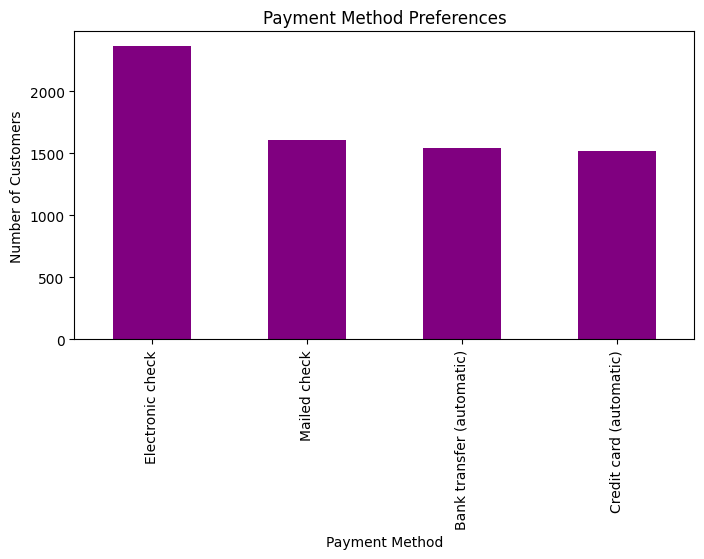

In [15]:
# Visualize Payment Method Distribution
plt.figure(figsize=(8, 4))
payment_method_counts.plot(kind='bar', color='purple')
plt.title('Payment Method Preferences')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.show()